            Timestamp   Price
Timestamp                    
1990-12-19 1990-12-19   96.05
1990-12-20 1990-12-20  104.30
1990-12-21 1990-12-21  109.07
1990-12-24 1990-12-24  113.57
1990-12-25 1990-12-25  120.09


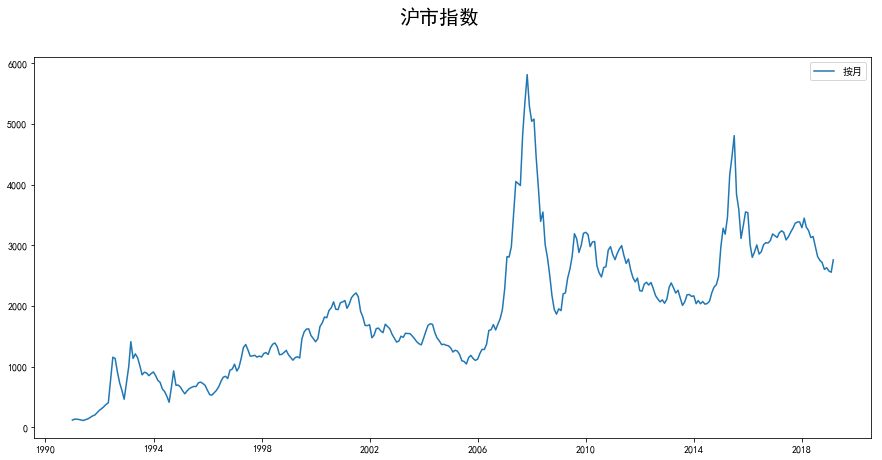

参数错误: (0, 2)
最优模型:                               ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  339
Model:                     ARMA(2, 2)   Log Likelihood               -2208.110
Method:                       css-mle   S.D. of innovations            162.159
Date:                Wed, 17 Apr 2019   AIC                           4428.219
Time:                        15:17:12   BIC                           4451.175
Sample:                    12-31-1990   HQIC                          4437.367
                         - 02-28-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1839.2500    489.792      3.755      0.000     879.276    2799.224
ar.L1.Price     0.5137      0.130      3.959      0.000       0.259       0.768
ar.L2.Price     0.4501      0

In [3]:
# -*- coding:utf-8 -*-
# 编码使用 ARMA 模型对沪市指数未来 10 个月（截止到 2019 年 12 月 31 日）的变化进行预测
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')

# 数据加载
df=pd.read_csv('f:/svm/shanghai_1990-12-19_to_2019-2-28.csv')
# 将时间作为 df 的索引
df.Timestamp=pd.to_datetime(df.Timestamp)
df.index=df.Timestamp

# 数据探索
print(df.head())

# 按照月来统计
df_month=df.resample('M').mean()

# 按照月来显示沪市指数的走势
fig=plt.figure(figsize=[15,7])
plt.rcParams['font.sans-serif']=['SimHei']
plt.suptitle('沪市指数',fontsize=20)

plt.plot(df_month.Price,'-',label='按月')
plt.legend()
plt.show()

# 设置参数范围
ps=range(0,3)
qs=range(0,3)
parameters=product(ps,qs)
parameters_list=list(parameters)

# 寻找最优 ARMA 模型参数，即 best_aic 最小
results=[]
best_aic=float('inf')# 正无穷
for param in parameters_list:
    try:
        model=ARMA(df_month.Price,order=(param[0],param[1])).fit()
    except ValueError:
        print('参数错误:',param)
        continue
    aic=model.aic
    if aic<best_aic:
        best_model=model
        best_aic=aic
        best_param=param
    results.append([param,model.aic])
# 输出最优模型
result_table=pd.DataFrame(results)
result_table.columns=['parameters','aic']
print('最优模型:',best_model.summary())


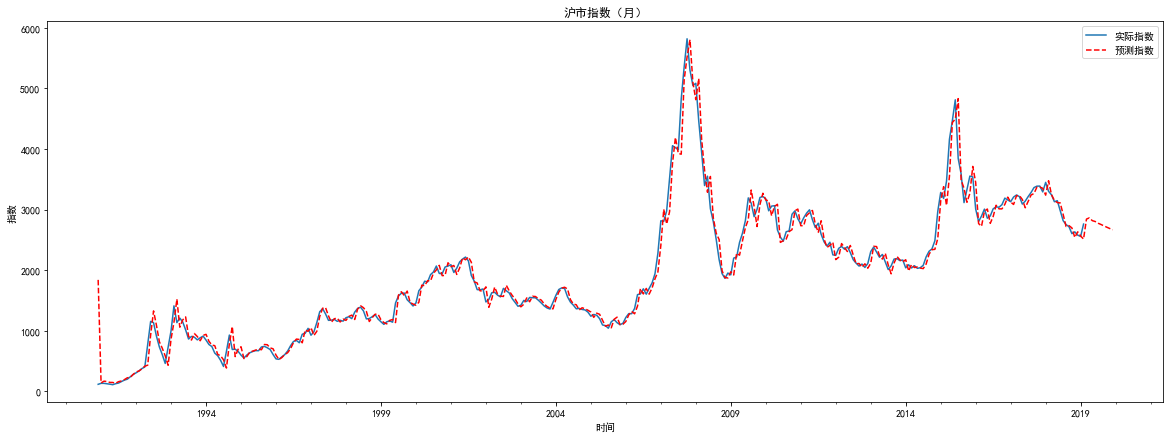

In [4]:

# 沪市指数预测
df_month2=df_month[['Price']]
date_list= [datetime(2019, 3, 31), datetime(2019, 4, 30), datetime(2019, 5, 31), datetime(2019, 6, 30), datetime(2019, 7, 31),
             datetime(2019, 8, 31), datetime(2019, 9, 30), datetime(2019, 10, 31),datetime(2019, 11, 30),datetime(2019, 12, 31)]
future=pd.DataFrame(index=date_list,columns=df_month.columns)
df_month2=pd.concat([df_month2,future])
df_month2['forecast']=best_model.predict(start=0,end=348)
# 沪市指数预测结果显示
plt.figure(figsize=(20,7))
df_month2.Price.plot(label='实际指数')
df_month2.forecast.plot(color='r',ls='--',label='预测指数')
plt.legend()
plt.title('沪市指数（月）')
plt.xlabel('时间')
plt.ylabel('指数')
plt.show()